# Variational principle
Code implementing the variational principle for a 1D potential.
To try different things, change:
- the potential function V
- the wavefunction psi
- the initial guess of the wavefunction parameters aguess

In [14]:
import numpy as np
from scipy.optimize import minimize
from scipy.integrate import quad
from scipy.misc import derivative

In [15]:
xmin = -4.0; xmax = 4.0 #limits of integration, may be np.inf (infinity)
hbar = 1.0; mass = 1.0 # some constants.  Changing mass will also change the energy scale.

In [84]:
def V(x):
    # this example is the finite square well
    # make sure this function is "vectorizable" and does not have any division by zero
    return x**2

In [95]:
def psi(x,a):
    '''Wavefunction as a function of position x.
    The array "a" stores any parameters.'''
    # Note, normalization is not necessary
    return np.sin(a[0]*x+a[1])

In [105]:
aguess = [0.5,1.6] # guess of the arguments that minimize the wavefunction

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
xlist = np.linspace(xmin, xmax, 101)
ylist = [V(x) for x in xlist]
psilist = [psi(x,aguess) for x in xlist]

In [108]:
def Hpsi(x,a):
    '''The Hamiltonian acting on psi at point x'''
    return -0.5*hbar**2/mass *derivative(psi, x, n=2, args=(a,)) + V(x)*psi(x,a)

In [109]:
def EVH(a, psi):
    '''Expectation value of the Hamiltonian for wavefunction psi that has the arguments a
    psi is a function of x and a
    a is a list of parameters for the wavefunction'''
    # Calculate normalization of psi
    norm = quad(lambda x, a:np.abs(psi(x,a))**2, xmin, xmax, args=(a,))[0]
    ev = quad(lambda x, a:np.conj(psi(x,a))*Hpsi(x,a), xmin, xmax, args=(a,))[0]
    return ev/norm

In [110]:
output = minimize(EVH, aguess, args=(psi,))
outlist = [psi(x,output.x) for x in xlist]

In [111]:
problist = [np.abs(psi(x,output.x))**2 for x in xlist]


In [112]:
print("Minimum energy: {} for arguments {}".format(output.fun,output.x))

Minimum energy: 1.6219932745368224 for arguments [0.47107781 1.57079629]


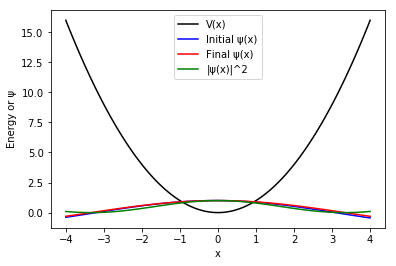

In [113]:
plt.plot(xlist,ylist,'k-', label = "V(x)")
plt.plot(xlist,psilist,'b-', label = "Initial ψ(x)")
plt.plot(xlist,outlist,'r-', label = "Final ψ(x)")
plt.plot(xlist,problist, 'g-', label = "|ψ(x)|^2")
plt.legend();
plt.xlabel("x");
plt.ylabel("Energy or ψ");